In [53]:
import sqlite3
import pandas as pd
import seaborn as sns

In [54]:
# Connecting to local sqlite3 database
conn = sqlite3.connect("user_data_spotify.db")

[Text(0.5, 1.0, "User's top artists ranked by their popularity in Spotify")]

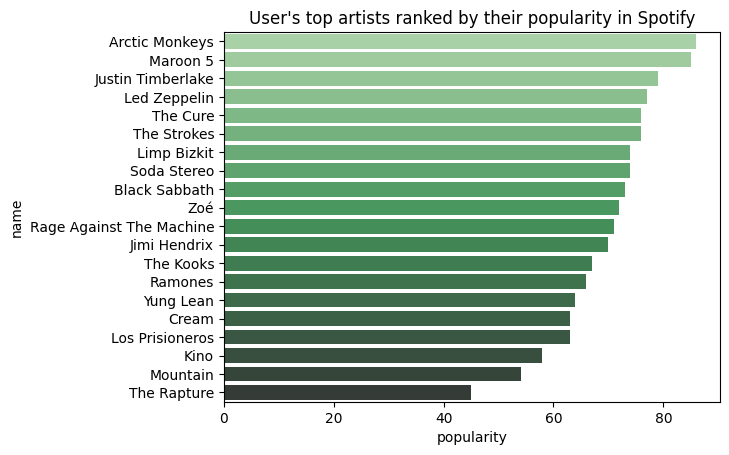

In [55]:
# Querying user top artists
query = "SELECT * FROM user_top_artists ORDER BY popularity DESC;"
artists_df = pd.read_sql_query(query, conn)

sns.barplot(data=artists_df, x=artists_df["popularity"], y=artists_df["name"], palette="Greens_d").set(title="User's top artists ranked by their popularity in Spotify")

<Axes: xlabel='popularity', ylabel='name'>

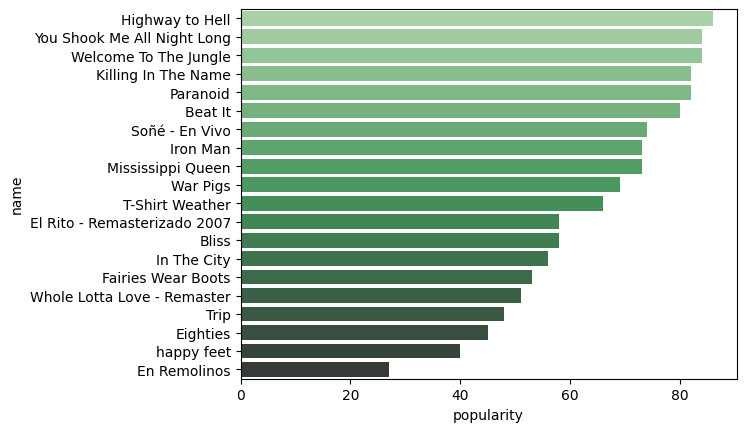

In [56]:
# Querying user top songs
query = """
SELECT name, popularity
FROM user_top_songs
ORDER BY popularity DESC;
"""

top_songs_df = pd.read_sql_query(query, conn)
sns.barplot(data=top_songs_df, x=top_songs_df["popularity"], y=top_songs_df["name"], palette="Greens_d")

[Text(0.5, 1.0, 'Distribution of user top songs tempos')]

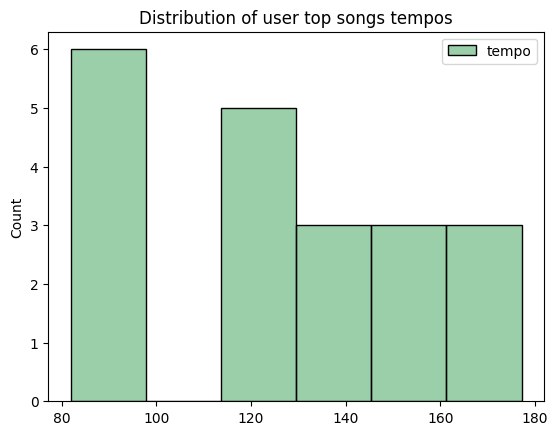

In [57]:
# Querying user top songs and extracting their tempos
query = """
SELECT tempo
FROM user_top_songs
ORDER BY tempo DESC;
"""

songs_tempos_df = pd.read_sql(query, conn)

sns.histplot(data=songs_tempos_df, bins="auto", palette="Greens_d").set(title="Distribution of user top songs tempos")